In [45]:
using DrWatson
quickactivate(@__DIR__)

using NetHeider
using LinearAlgebra
using LightGraphs
using Plots
using DataFrames
using JLD2
using Statistics

include(projectdir("scripts", "notebook_res_anal_funs.jl"))


plot_dict (generic function with 1 method)

In [5]:
res = jldopen(datadir("sims7", "collected_results.jld2")) do file
    file["res"]
end
first(res, 10)

10×40 DataFrame
 Row │ inform_every  add_edges          m_filename   pr_neg    padd      measu ⋯
     │ Float64?      #add_sin…?         String?      Float64?  Float64?  Union ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │         0.25  add_single_edge2!  results.csv      0.05      0.01        ⋯
   2 │         0.25  add_single_edge2!  results.csv      0.15      0.01
   3 │         0.25  add_single_edge2!  results.csv      0.1       0.01
   4 │         0.25  add_single_edge2!  results.csv      0.25      0.01
   5 │         0.25  add_single_edge2!  results.csv      0.2       0.01        ⋯
   6 │         0.25  add_single_edge2!  results.csv      0.3       0.01
   7 │         0.25  add_single_edge2!  results.csv      0.05      0.01
   8 │         0.25  add_single_edge2!  results.csv      0.15      0.01
   9 │         0.25  add_single_edge2!  results.csv      0.1       0.01        ⋯
  10 │         0.25  add_single_edge2!  results.csv      0.25      0.01
                                                              35 columns omitted

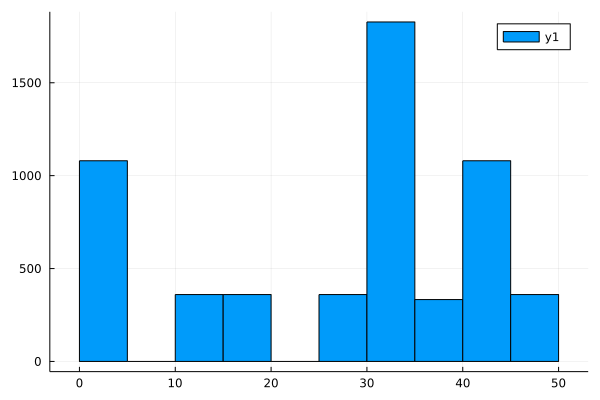

In [3]:
res.bal2bal_mean[100]
res.bu_mean[15][1,1,:]
sum(res.bu_mean[15][1,1,:])
# res.bal_unbal_table[1000][1,:,1,1]

histogram([sum(res.bu_mean[i][1,1,:]) for i in 1:nrow(res)])

In [4]:
res.bal2bal_mean[1]

80×1 Matrix{Float64}:
 0.9
 0.9
 0.9
 0.9
 0.95
 0.95
 0.9
 0.9
 0.9
 0.85
 ⋮
 0.8947368421052632
 0.8947368421052632
 1.0
 1.0
 0.9444444444444444
 0.9444444444444444
 0.9444444444444444
 0.888888888888889
 0.9444444444444444

In [24]:
names(res)[1:end]

40-element Vector{String}:
 "inform_every"
 "add_edges"
 "m_filename"
 "pr_neg"
 "padd"
 "measure_balance_every_step"
 "bal2not_mean2"
 "net_str"
 "balanced_std"
 "N"
 ⋮
 "unbal2bal_mean2"
 "triads_num"
 "last_val"
 "unbal2bal_mean"
 "attr"
 "pn"
 "save_after"
 "bal2bal_mean2"
 "path"

In [6]:
size(res)

(5760, 40)

In [32]:
unique(res.pr_pos)

6-element Vector{Union{Missing, Float64}}:
 0.05
 0.15
 0.1
 0.25
 0.2
 0.3

In [40]:
# parameters
pn = 1.
pclose_triad = 0.
pr_pos = pr_neg = 0.3
padd = 0.01
threshold = [0:15...]/16

fields = Symbol.(["pn", "pclose_triad", "pr_pos", "pr_neg", "padd", "threshold"])
values = []

dict = @dict pn pclose_triad pr_pos pr_neg padd threshold

L = nrow(res)

# which_rows = zeros(Bool, L)
cropped_res = deepcopy(res)
for (field, values) in dict
    inds = findall(x->x in values, cropped_res[:, field])
    # display(length(inds))
    # display(field)
    cropped_res = cropped_res[inds,:]
end

display(nrow(cropped_res))

16

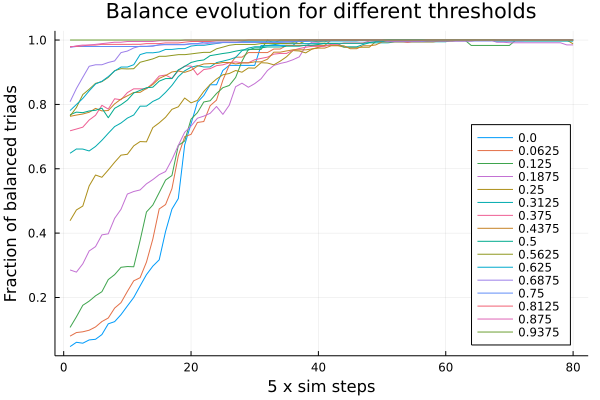

In [41]:
#balanced_mean

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    plot!(cropped_res[ind, :balanced_mean], label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("Fraction of balanced triads")
title!("Balance evolution for different thresholds")

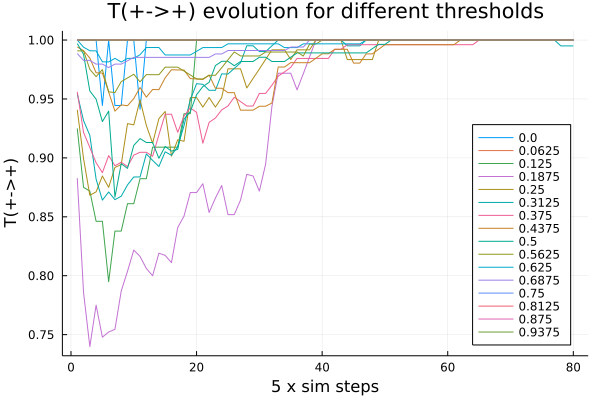

In [42]:
#bal2bal_mean, time evol

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("T(+->+)")
title!("T(+->+) evolution for different thresholds")

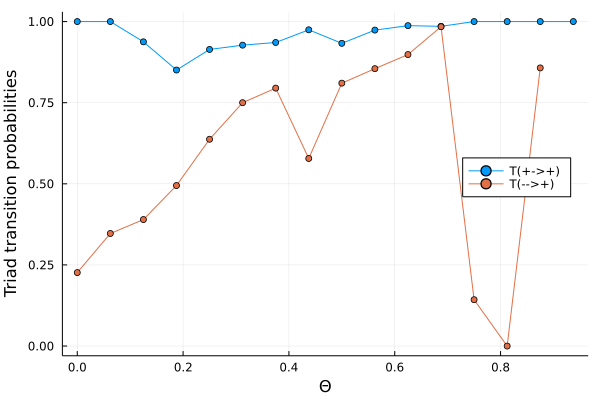

In [43]:
#bal2bal_mean, specific time

time_steps = 90
time_ind = Int(time_steps / 5)

xvals = cropped_res[:, :threshold]
yvals1 = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
plot(xvals, yvals1, markershape = :circle, label = "T(+->+)", legend = :right)#, linestyle = :none)

yvals2 = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

plot!(xvals, yvals2, markershape = :circle, label = "T(-->+)")#, linestyle = :none)


# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")
ylabel!("Triad transition probabilities")
# title!("T(+->+) evolution for different thresholds")

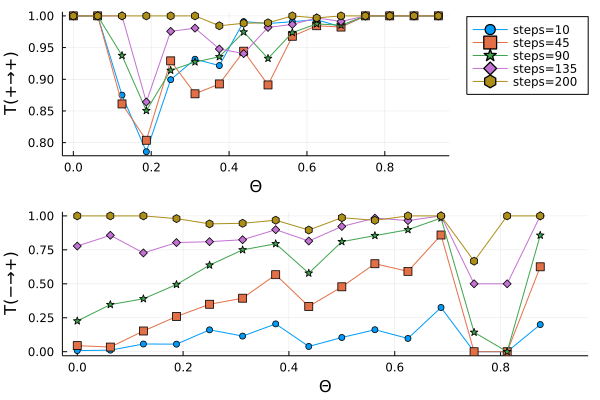

In [44]:
#bal2bal_mean, different time steps
markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

time_stepss = [10, 45, 90, 135, 200] 
time_inds = Int.(time_stepss / 5)

p1 = plot(legend = :outertopright)
ylabel!("T(+→+)")
p2 = plot(legend = false)
ylabel!("T(−→+)")
for (i, time_ind) in enumerate(time_inds)
    xvals = cropped_res[:, :threshold]
    yvals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
    plot!(p1, xvals, yvals, markershape = markers[i], label = "steps="*string(5*time_ind))#, linestyle = :none)

    yvals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]
    plot!(p2, xvals, yvals, markershape = markers[i], label = "steps="*string(5*time_ind))#, linestyle = :none)
end
plot(p1, p2, layout = (2,1))
xlabel!("Θ")
# ylabel!(["T(+->+)" "ff"])

# title!("T(+->+) evolution for different thresholds")

In [38]:
time_ind = time_inds[end-1]
yvals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

16-element Vector{Float64}:
   0.14563106796116507
   0.24028268551236748
   0.410828025477707
   0.5137254901960784
   0.5588235294117647
   0.6923076923076923
   0.8173076923076923
   0.7777777777777778
   0.8854166666666667
   0.9816513761467891
   0.979591836734694
   1.0
   1.0
   0.6666666666666667
   1.0
 NaN

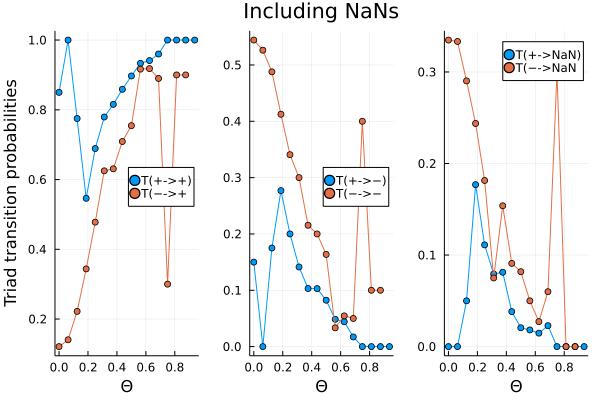

In [49]:
#bal2bal_mean2, specific time

time_steps = 135
time_ind = Int(time_steps / 5)

xvals = cropped_res[:, :threshold]
b2b = [val[time_ind] for val in cropped_res[:, :bal2bal_mean2]]
b2u = [val[time_ind] for val in cropped_res[:, :bal2unbal_mean2]]
b2n = [val[time_ind] for val in cropped_res[:, :bal2not_mean2]]
u2b = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean2]]
u2u = [val[time_ind] for val in cropped_res[:, :unbal2unbal_mean2]]
u2n = [val[time_ind] for val in cropped_res[:, :unbal2not_mean2]]

p1 = plot(xvals, b2b, markershape = :circle, label = "T(+->+)", legend = :right)#, linestyle = :none)
plot!(xvals, u2b, markershape = :circle, label = "T(−->+")

p2 = plot(xvals, b2u, markershape = :circle, label = "T(+->−)", legend = :right)#, linestyle = :none)
plot!(xvals, u2u, markershape = :circle, label = "T(−->−")

p3 = plot(xvals, b2n, markershape = :circle, label = "T(+->NaN)", legend = :topright)#, linestyle = :none)
plot!(xvals, u2n, markershape = :circle, label = "T(−->NaN")

ylabel!(p1, "Triad transition probabilities")
title!(p2, "Including NaNs")
plot(p1, p2, p3, layout = (1,3))

# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")

# title!("T(+->+) evolution for different thresholds")

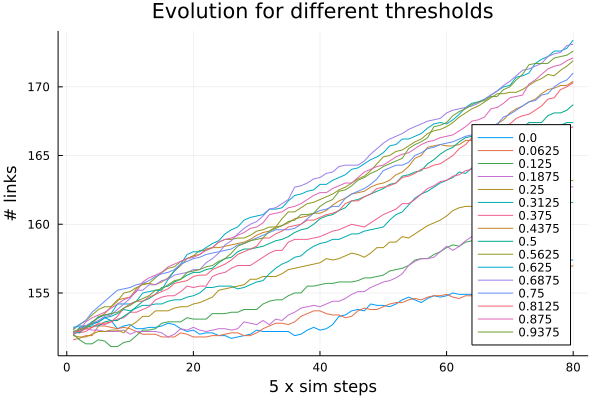

In [50]:
#links_num

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]

    vals = cropped_res[ind, :links_num]'
    # display(ind)
    plot!(mean(vals, dims=2), label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("# links")
title!("Evolution for different thresholds")

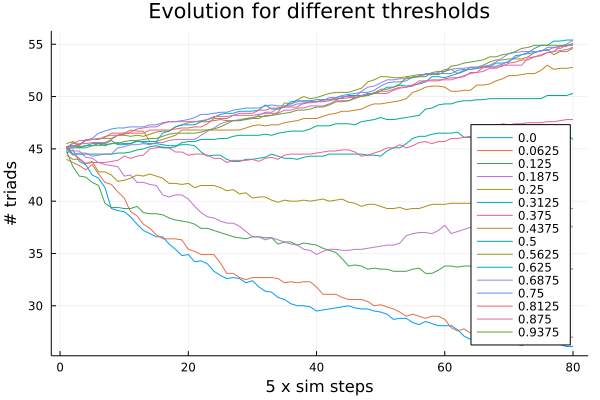

In [51]:
#triads_num

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    vals = cropped_res[ind, :triads_num]'
    # display(ind)
    plot!(mean(vals, dims=2), label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("# triads")
title!("Evolution for different thresholds")

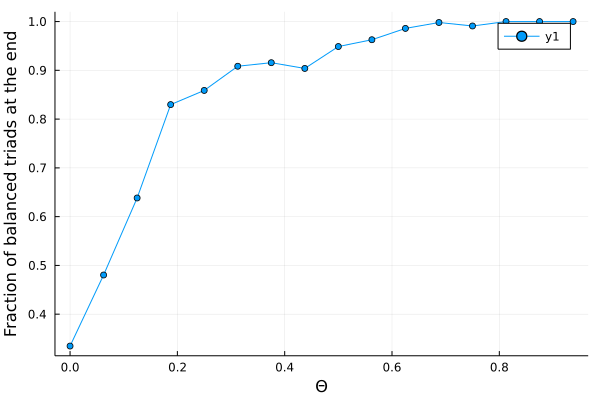

In [52]:
#last_val, specific time

# time_steps = 90
# time_ind = Int(time_steps / 10)

xvals = cropped_res[:, :threshold]
yvals1 = cropped_res[:, :last_val]
plot(xvals, yvals1, markershape = :circle)#, linestyle = :none)

# yvals2 = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

# plot!(xvals, yvals2, markershape = :circle, label = "T(-->+)")#, linestyle = :none)


# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")
ylabel!("Fraction of balanced triads at the end")
# title!("T(+->+) evolution for different thresholds")

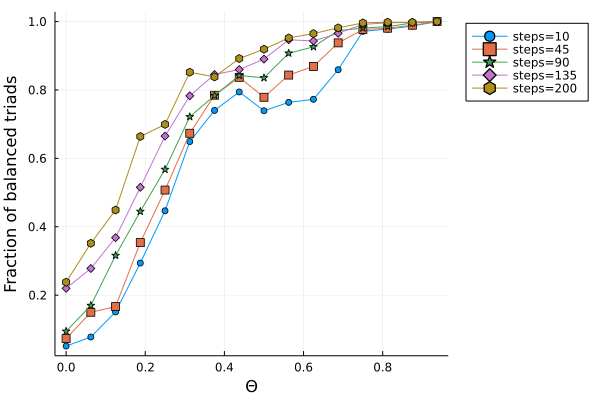

In [53]:
#balanced fraction, different time steps
markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

time_stepss = [10, 45, 90, 135, 200] 
time_inds = Int.(time_stepss / 5)

p1 = plot(legend = :outertopright)
ylabel!("Fraction of balanced triads")
# p2 = plot(legend = false)
# ylabel!("T(−→+)")
for (i, time_ind) in enumerate(time_inds)
    xvals = cropped_res[:, :threshold]
    yvals = [val[time_ind] for val in cropped_res[:, :balanced_mean]]
    plot!(p1, xvals, yvals, markershape = markers[i], label = "steps="*string(5*time_ind))#, linestyle = :none)

    # yvals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]
    # plot!(p2, xvals, yvals, markershape = markers[i], label = "steps="*string(10*time_ind))#, linestyle = :none)
end
# plot(p1, p2, layout = (2,1))
plot(p1)
xlabel!("Θ")
# ylabel!(["T(+->+)" "ff"])

# title!("T(+->+) evolution for different thresholds")

# Finding best simulation parameters

In [9]:
real_trans_df = jldopen(datadir("exp_pro", "real_randomized_triad_trans_results.jld2")) do file
    file["res"]
end
first(real_trans_df, 10)

10×11 DataFrame
 Row │ threshold  netsense_b2b  netsense_u2b  node_rand_b2b  node_rand_u2b  no ⋯
     │ Float64    Any           Any           Any            Any            An ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    0.0     0.4           0.0175439     0.2            0.00258333     0. ⋯
   2 │    0.0625  0.2           0.0769231     0.374167       0.0163158      0.
   3 │    0.125   0.631579      0.209302      0.486538       0.0582         0.
   4 │    0.1875  0.612903      0.451613      0.560926       0.120694       0.
   5 │    0.25    0.794872      0.391304      0.696765       0.224655       0. ⋯
   6 │    0.3125  0.731707      0.619048      0.752222       0.332889       0.
   7 │    0.375   0.837209      0.736842      0.776813       0.406          0.
   8 │    0.4375  0.891304      0.375         0.817742       0.371515       0.
   9 │    0.5     0.869565      0.625         0.816774       0.400303       0. ⋯
  10 │    0.5625  0.78          0.416667      0.864194       0.383333       0.
                                                               6 columns omitted

In [55]:

# dict should be create the following way. df has fields :a, :b, then:
# a = [4] # where 4 is the value which extracted rows should have
# b = [2]
# dict = @dict a b
function get_part_dataframe(df::DataFrame, dict::Dict; verbose = true)
    cropped_res = deepcopy(df)
    for (field, values) in dict
        inds = findall(x->x in values, cropped_res[:, field])
        cropped_res = cropped_res[inds,:]
    end
    if verbose
        display("Extracted " * string(nrow(cropped_res)) * " rows.")
    end
    return cropped_res
end


function calc_error(b2b1, u2b1, b2b2, u2b2; method = "mse")

    b2b_non_nan = (.!(isnan.(b2b1)) .+ .!(isnan.(b2b2)) ) .== 2

    # if sum(b2b_non_nan) < length(b2b1)
    #     return calc_error(b2b1[b2b_non_nan], u2b1, b2b2[b2b_non_nan], u2b2; method = method)
    # end

    u2b_non_nan = (.!(isnan.(u2b1)) .+ .!(isnan.(u2b2)) ) .== 2

    # if sum(u2b_non_nan) < length(b2b1)
    #     return calc_error(b2b1, u2b1[u2b_non_nan], b2b2, u2b2[u2b_non_nan]; method = method)
    # end

    if method == "mse"
        error = sum((b2b1[b2b_non_nan] .- b2b2[b2b_non_nan]).^2) + sum((u2b1[u2b_non_nan] .- u2b2[u2b_non_nan]).^2)
    elseif method == "mae"
        error = sum(abs.(b2b1[b2b_non_nan] .- b2b2[b2b_non_nan])) + sum(abs.(u2b1[u2b_non_nan] .- u2b2[u2b_non_nan]))
    elseif method == "mse_notbeg"
        # b2b_non_nan[1:3] = 0
        return calc_error(b2b1[4:end], u2b1[4:end], b2b2[4:end], u2b2[4:end]; method = "mse")
    elseif method == "mae_notbeg"
        return calc_error(b2b1[4:end], u2b1[4:end], b2b2[4:end], u2b2[4:end]; method = "mae")
    end

    return error
end

calc_error (generic function with 1 method)

In [46]:
fname = datadir("exp_pro", "sim_add_each_turn_compared_to_rl_sims7_withT.jld2")
if isfile(fname)
    results_df = jldopen(fname) do file
        file["res"]
    end
    display(first(results_df, 3))

    calc_errors = false
else
    calc_errors = true
end

3×13 DataFrame
 Row │ padd     pr_neg   pn       pclose_triad  pr_pos   dict_ind  time_ind  m ⋯
     │ Float64  Float64  Float64  Float64       Float64  Int64     Float64   F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    0.01     0.05      0.0           0.0     0.05         1       9.0  3 ⋯
   2 │    0.01     0.05      0.0           0.0     0.05         1      18.0  1
   3 │    0.01     0.05      0.0           0.0     0.05         1      27.0  1
                                                               6 columns omitted

false

In [47]:
calc_errors = true

true

In [48]:
# parameters
pn = unique(res.pn)
pclose_triad = unique(res.pclose_triad)
pr_pos = pr_neg = unique(res.pr_pos)
padd = unique(res.padd)
threshold = [0:15...]/16

time_points = [45, 90, 135, 180, 270]
time_inds = Int.(time_points ./ 5)

strdicts = @strdict pn padd pclose_triad pr_pos pr_neg
dicts = dict_list(strdicts)

if calc_errors
    x = dicts[1]
    results_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
    results_df.dict_ind = [0]
    results_df.time_ind = [0.]
    results_df.mse = [0.]
    results_df.mae = [0.]
    results_df.mse_notbeg = [0.]
    results_df.mae_notbeg = [0.]
    results_df.T_mse_notbeg = [0.]
    results_df.T_mae_notbeg = [0.]
    results_df.mse_manyT = [0.]
    results_df.mae_manyT = [0.]
    delete!(results_df, 1)

    for (dict_ind, dict) in enumerate(dicts)
        if dict["pr_pos"] != dict["pr_neg"]
            continue
        end
        
        cropped_res = get_part_dataframe(res, dict; verbose =false)
        if nrow(cropped_res) == 0
            display(dict)
        end
        for (i, time_ind) in enumerate(time_inds)
            xvals = cropped_res[:, :threshold]
            b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
            u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

            #sorting, just in case
            inds = sortperm(xvals)
            xvals = xvals[inds]
            b2b_vals = b2b_vals[inds]
            u2b_vals = u2b_vals[inds]

            @assert xvals == real_trans_df.threshold

            mse = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
            mae = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
            mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
            mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")
            T_mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "T--_mse_notbeg")
            T_mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "T--_mae_notbeg")
            mse_manyT = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_manyT")
            mae_manyT = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_manyT")

            x = dict
            temp_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
            temp_df.dict_ind = [dict_ind]
            temp_df.time_ind = [time_ind]
            temp_df.mse = [mse]
            temp_df.mae = [mae]
            temp_df.mse_notbeg = [mse_notbeg]
            temp_df.mae_notbeg = [mae_notbeg]
            temp_df.T_mse_notbeg = [T_mse_notbeg]
            temp_df.T_mae_notbeg = [T_mae_notbeg]
            temp_df.mse_manyT = [mse_manyT]
            temp_df.mae_manyT = [mae_manyT]
            
            append!(results_df, temp_df)
        end
    end

    foldername = "exp_pro"

    fname = datadir(foldername, "sim_add_each_turn_compared_to_rl_sims7_withT.jld2")
    jldopen(fname, "w") do file
        file["res"] = results_df
    end;
end

1800×15 DataFrame
  Row │ padd     pr_neg   pn       pclose_triad  pr_pos   dict_ind  time_ind   ⋯
      │ Float64  Float64  Float64  Float64       Float64  Int64     Float64    ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │    0.01     0.05      0.0          0.0      0.05         1       9.0   ⋯
    2 │    0.01     0.05      0.0          0.0      0.05         1      18.0
    3 │    0.01     0.05      0.0          0.0      0.05         1      27.0
    4 │    0.01     0.05      0.0          0.0      0.05         1      36.0
    5 │    0.01     0.05      0.0          0.0      0.05         1      54.0   ⋯
    6 │    0.03     0.05      0.0          0.0      0.05         2       9.0
    7 │    0.03     0.05      0.0          0.0      0.05         2      18.0
    8 │    0.03     0.05      0.0          0.0      0.05         2      27.0
  ⋮   │    ⋮        ⋮        ⋮          ⋮           ⋮        ⋮         ⋮       ⋱
 1794 │    0.07     0.3       1.0          0.35     0.3       2159      36.0   ⋯
 1795 │    0.07     0.3       1.0          0.35     0.3       2159      54.0
 1796 │    0.09     0.3       1.0          0.35     0.3       2160       9.0
 1797 │    0.09     0.3       1.0          0.35     0.3       2160      18.0
 1798 │    0.09     0.3       1.0          0.35     0.3       2160      27.0   ⋯
 1799 │    0.09     0.3       1.0          0.35     0.3       2160      36.0
 1800 │    0.09     0.3       1.0          0.35     0.3       2160      54.0
                                                 8 columns and 1785 rows omitted

"Extracted 16 rows."

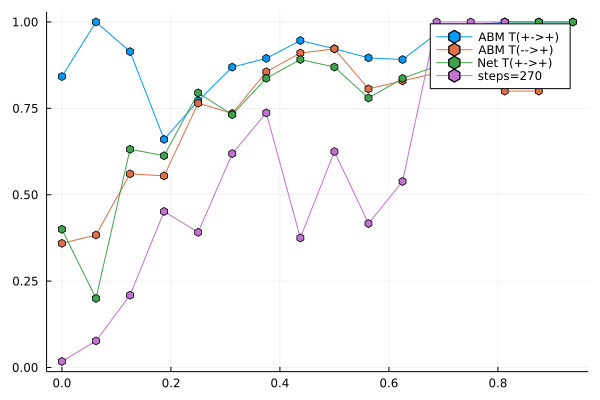

In [65]:
dict = dicts[1]
cropped_res = get_part_dataframe(res, dict)

i = 5
time_ind = Int(time_inds[5])
xvals = cropped_res[:, :threshold]
b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

plot(xvals, b2b_vals, markershape = markers[i], label = "ABM T(+->+)")#, linestyle = :none)
plot!(xvals, u2b_vals, markershape = markers[i], label = "ABM T(-->+)")#, linestyle = :none)
plot!(real_trans_df.threshold, real_trans_df.netsense_b2b, markershape = markers[i], label = "Net T(+->+)")#, linestyle = :none)
plot!(real_trans_df.threshold, real_trans_df.netsense_u2b, markershape = markers[i], label = "steps="*string(5*time_ind))#, linestyle = :none)


In [66]:
@assert xvals == real_trans_df.threshold

mse = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
mae = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")

mse, mae, mse_notbeg, mae_notbeg

(2.172948375068523, 5.884051394912722, 0.9234128913984453, 3.359668005460775)

In [68]:
cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
inds = zeros(Int, length(cols))
for (i, col) in enumerate(cols)
    inds2 = findall(results_df[:, col] .== minimum(results_df[:, col]))
    if length(inds2) > 1
        display(inds2)
    end
    inds[i] = inds2[1]
end
inds

4-element Vector{Int64}:
 199
  32
  28
  32

In [70]:
results_df[28, :dict_ind]
# results_df[665, :]
# dicts[665]

31

"Extracted 16 rows."

"Dict(\"padd\" => 0.03, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"Extracted 16 rows."

"Dict(\"padd\" => 0.01, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"Extracted 16 rows."

"Dict(\"padd\" => 0.09, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.05)"

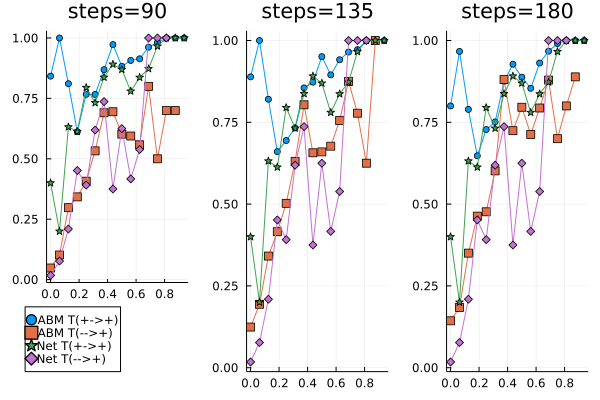

In [72]:
function plot_dict(dicts, df, param_ind)

    dict = dicts[results_df[param_ind, :dict_ind]]
    cropped_res = get_part_dataframe(res, dict)

    time_ind = Int(results_df[param_ind, :time_ind])
    xvals = cropped_res[:, :threshold]
    b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
    u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

    p1 = plot(xvals, b2b_vals, markershape = markers[1], label = "ABM T(+->+)")#, linestyle = :none)
    plot!(p1, xvals, u2b_vals, markershape = markers[2], label = "ABM T(-->+)")#, linestyle = :none)
    plot!(p1, real_trans_df.threshold, real_trans_df.netsense_b2b, markershape = markers[3], label = "Net T(+->+)")#, linestyle = :none)
    plot!(p1, real_trans_df.threshold, real_trans_df.netsense_u2b, markershape = markers[4], label = "Net T(-->+)")#, linestyle = :none)
    title!(p1, "steps="*string(5*time_ind))
    
    return p1
end

p1 = plot_dict(dicts, results_df, 32)
# title!(p1, string(dicts[results_df[665, :dict_ind]]))
display(string(dicts[results_df[32, :dict_ind]]))
p2 = plot_dict(dicts, results_df, 28)
display(string(dicts[results_df[28, :dict_ind]]))
# title!(p1, dicts[results_df[665, :dict_ind]])
p3 = plot_dict(dicts, results_df, 199)
display(string(dicts[results_df[199, :dict_ind]]))
# title!(p1, dicts[results_df[665, :dict_ind]])

plot!(p1, legend = :outertopright)
plot!(p1, legend = :outerbottom)
plot!(p2, legend = false)
plot!(p3, legend = false)

plot(p1, p2, p3, layout = (1,3))

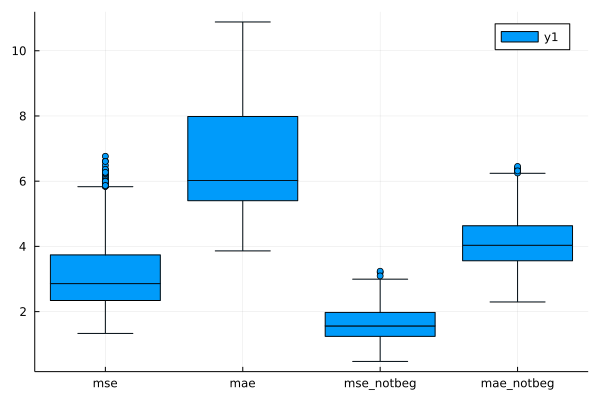

In [73]:
using StatsPlots

L = length(results_df.mse)
xvals = reduce(vcat, [repeat([i],L) for i in 1:4])
fields = [:mse, :mae, :mse_notbeg, :mae_notbeg]
yvals = reduce(vcat, [results_df[:,field] for field in fields])

boxplot(xvals, yvals, xticks = ([1, 2, 3, 4], fields))
# xticks!(["d", "e", "t"])
plot!()

In [49]:
#finding 10 best param sets

cols = [:mse, :mae, :mse_notbeg, :mae_notbeg, :T_mse_notbeg, :T_mae_notbeg, :mse_manyT, :mae_manyT]
mulinds = zeros(Int, length(cols), 10)
valinds = zeros(length(cols), 10)
for (i, col) in enumerate(cols)
    inds2 = partialsortperm(results_df[:, col], 1:10)
    
    mulinds[i,:] = inds2
    valinds[i,:] = results_df[inds2, col]
end
mulinds


8×10 Matrix{Int64}:
 199  224  200   28   178   32   532   179   173   198
  32   27  198   42   173  178   199    28   224   193
  28  308  199  532    32  799   178   200    53  1662
  32   28   27  198   199  308   178    39    42   173
  28  308  199  532  1662  799  1233    32   178   377
 308   28  798   32   532  377   799  1662  1177    27
  27  642  372   37   662   42    32   362   247    77
  27   42   32  182   642  337   467   841   362    37

In [50]:
valinds

8×10 Matrix{Float64}:
 1.3304    1.36886   1.38575   1.42887   …  1.47223   1.47279   1.48143
 3.86116   3.88805   3.98636   4.04584      4.15944   4.17225   4.18948
 0.471733  0.496511  0.510476  0.56615      0.598015  0.619203  0.625775
 2.29583   2.32621   2.36856   2.41559      2.49798   2.50625   2.51014
 0.419441  0.422235  0.477353  0.478285     0.536445  0.549955  0.556801
 1.72153   1.74166   1.78249   1.79757   …  1.87349   1.89681   1.91151
 0.165196  0.214505  0.229997  0.238881     0.252132  0.253031  0.255766
 1.39035   1.57742   1.63982   1.66985      1.76605   1.77962   1.78485

In [51]:
display(string(dicts[results_df[28, :dict_ind]]))
display(string(results_df[28, :time_ind]*5))

display(string(dicts[results_df[32, :dict_ind]]))
display(string(results_df[32, :time_ind]*5))

display(string(dicts[results_df[308, :dict_ind]]))
display(string(results_df[308, :time_ind]*5))

display(string(dicts[results_df[199, :dict_ind]]))
display(string(results_df[199, :time_ind]*5))


display(string(dicts[results_df[27, :dict_ind]]))
display(string(results_df[27, :time_ind]*5))

"Dict(\"padd\" => 0.01, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"135.0"

"Dict(\"padd\" => 0.03, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"90.0"

"Dict(\"padd\" => 0.03, \"pr_neg\" => 0.15, \"pn\" => 0.0, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.15)"

"135.0"

"Dict(\"padd\" => 0.09, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.05)"

"180.0"

"Dict(\"padd\" => 0.01, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"90.0"

To summarize. 

Overall, the best results were obtained with the following parameters. 

* Dict(\"padd\" => 0.03, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05), time = 90
* Dict(\"padd\" => 0.01, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05), time = 135

Slightly worse was:

* Dict(\"padd\" => 0.09, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.05), time = 270

Looking at the previous result (the model didn't change, just the time steps), my observation is that pr=0.05, pn=0.2. padd doesn't matter when pclose_triad=0.
If pclose_triad=0.35, then padd=0.09 seems the best option. 

## Assuming pn=0.8

In [77]:
fname = datadir("exp_pro", "sim_add_each_turn_compared_to_rl_sims7_pn0_8.jld2")
if isfile(fname)
    results_df = jldopen(fname) do file
        file["res"]
    end
    display(first(results_df, 3))

    calc_errors = false
else
    calc_errors = true
end

true

In [96]:
# parameters
pn = [0.8]
pclose_triad = unique(res.pclose_triad)
pr_pos = pr_neg = unique(res.pr_pos)
padd = unique(res.padd)
threshold = [0:15...]/16

time_points = [45, 90, 135, 180, 270]
time_inds = Int.(time_points ./ 5)

strdicts = @strdict pn padd pclose_triad pr_pos pr_neg
dicts = dict_list(strdicts)

if calc_errors
    x = dicts[1]
    results_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
    results_df.dict_ind = [0]
    results_df.time_ind = [0.]
    results_df.mse = [0.]
    results_df.mae = [0.]
    results_df.mse_notbeg = [0.]
    results_df.mae_notbeg = [0.]
    delete!(results_df, 1)

    for (dict_ind, dict) in enumerate(dicts)   
        if dict["pr_pos"] != dict["pr_neg"]
            continue
        end
        
        cropped_res = get_part_dataframe(res, dict; verbose =false)
        if nrow(cropped_res) == 0
            display(dict)
        end
        for (i, time_ind) in enumerate(time_inds)
            xvals = cropped_res[:, :threshold]
            b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
            u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

            #sorting, just in case
            inds = sortperm(xvals)
            xvals = xvals[inds]
            b2b_vals = b2b_vals[inds]
            u2b_vals = u2b_vals[inds]

            @assert xvals == real_trans_df.threshold

            mse = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
            mae = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
            mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
            mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")

            x = dict
            temp_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
            temp_df.dict_ind = [dict_ind]
            temp_df.time_ind = [time_ind]
            temp_df.mse = [mse]
            temp_df.mae = [mae]
            temp_df.mse_notbeg = [mse_notbeg]
            temp_df.mae_notbeg = [mae_notbeg]
            
            append!(results_df, temp_df)
        end
    end


    jldopen(fname, "w") do file
        file["res"] = results_df
    end;
end

300×11 DataFrame
 Row │ padd     pr_neg   pn       pclose_triad  pr_pos   dict_ind  time_ind  m ⋯
     │ Float64  Float64  Float64  Float64       Float64  Int64     Float64   F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    0.01     0.05      0.8          0.0      0.05         1       9.0  2 ⋯
   2 │    0.01     0.05      0.8          0.0      0.05         1      18.0  2
   3 │    0.01     0.05      0.8          0.0      0.05         1      27.0  2
   4 │    0.01     0.05      0.8          0.0      0.05         1      36.0  2
   5 │    0.01     0.05      0.8          0.0      0.05         1      54.0  2 ⋯
   6 │    0.03     0.05      0.8          0.0      0.05         2       9.0  2
   7 │    0.03     0.05      0.8          0.0      0.05         2      18.0  2
   8 │    0.03     0.05      0.8          0.0      0.05         2      27.0  1
  ⋮  │    ⋮        ⋮        ⋮          ⋮           ⋮        ⋮         ⋮        ⋱
 294 │    0.07     0.3       0.8          0.35     0.3        359      36.0  5 ⋯
 295 │    0.07     0.3       0.8          0.35     0.3        359      54.0  5
 296 │    0.09     0.3       0.8          0.35     0.3        360       9.0  3
 297 │    0.09     0.3       0.8          0.35     0.3        360      18.0  2
 298 │    0.09     0.3       0.8          0.35     0.3        360      27.0  3 ⋯
 299 │    0.09     0.3       0.8          0.35     0.3        360      36.0  4
 300 │    0.09     0.3       0.8          0.35     0.3        360      54.0  5
                                                  4 columns and 285 rows omitted

In [97]:
cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
inds = zeros(Int, length(cols))
for (i, col) in enumerate(cols)
    inds2 = findall(results_df[:, col] .== minimum(results_df[:, col]))
    if length(inds2) > 1
        display(inds2)
    end
    inds[i] = inds2[1]
end
inds

4-element Vector{Int64}:
 143
  42
  82
  42

In [98]:
#finding 10 best param sets

cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
mulinds = zeros(Int, length(cols), 10)
valinds = zeros(length(cols), 10)
for (i, col) in enumerate(cols)
    inds2 = partialsortperm(results_df[:, col], 1:10)
    
    mulinds[i,:] = inds2
    valinds[i,:] = results_df[inds2, col]
end
mulinds


4×10 Matrix{Int64}:
 143  43   82  62   44  18   9  88  113    8
  42  27   43  82    7  92  62  32   76  122
  82  83  192  62  113  43  58  27  238  143
  42  43   27  82   28  62   9   3    7  237

In [99]:
valinds

4×10 Matrix{Float64}:
 1.71509   1.71725   1.72099   1.72686   …  1.79464   1.82464   1.82562
 4.38087   4.61125   4.62654   4.6914       4.78731   4.8464    4.84975
 0.827568  0.883385  0.886509  0.888399     0.914655  0.921568  0.922194
 2.90857   2.92523   3.01994   3.07232      3.17298   3.19725   3.19962

In [101]:
function show_res(df::DataFrame, dicts, num)
    display(string(dicts[results_df[num, :dict_ind]]))
    display(string(results_df[num, :time_ind]*5))
end

show_res(results_df, dicts, 82)
show_res(results_df, dicts, 42)
show_res(results_df, dicts, 143)
show_res(results_df, dicts, 43)


"Dict(\"padd\" => 0.03, \"pr_neg\" => 0.15, \"pn\" => 0.8, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.15)"

"90.0"

"Dict(\"padd\" => 0.07, \"pr_neg\" => 0.05, \"pn\" => 0.8, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.05)"

"90.0"

"Dict(\"padd\" => 0.07, \"pr_neg\" => 0.1, \"pn\" => 0.8, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.1)"

"135.0"

"Dict(\"padd\" => 0.07, \"pr_neg\" => 0.05, \"pn\" => 0.8, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.05)"

"135.0"

## Assuming pn=0.4

In [52]:
fname = datadir("exp_pro", "sim_add_each_turn_compared_to_rl_sims7_pn0_4_withT.jld2")
if isfile(fname)
    results_df = jldopen(fname) do file
        file["res"]
    end
    display(first(results_df, 3))

    calc_errors = false
else
    calc_errors = true
end

true

In [53]:
# parameters
pn = [0.4]
pclose_triad = unique(res.pclose_triad)
pr_pos = pr_neg = unique(res.pr_pos)
padd = unique(res.padd)
threshold = [0:15...]/16

time_points = [45, 90, 135, 180, 270]
time_inds = Int.(time_points ./ 5)

strdicts = @strdict pn padd pclose_triad pr_pos pr_neg
dicts = dict_list(strdicts)

if calc_errors
    x = dicts[1]
    results_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
    results_df.dict_ind = [0]
    results_df.time_ind = [0.]
    results_df.mse = [0.]
    results_df.mae = [0.]
    results_df.mse_notbeg = [0.]
    results_df.mae_notbeg = [0.]
    results_df.mse_manyT = [0.]
    results_df.mae_manyT = [0.]
    delete!(results_df, 1)

    for (dict_ind, dict) in enumerate(dicts)   
        if dict["pr_pos"] != dict["pr_neg"]
            continue
        end
        
        cropped_res = get_part_dataframe(res, dict; verbose =false)
        if nrow(cropped_res) == 0
            display(dict)
        end
        for (i, time_ind) in enumerate(time_inds)
            xvals = cropped_res[:, :threshold]
            b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
            u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

            #sorting, just in case
            inds = sortperm(xvals)
            xvals = xvals[inds]
            b2b_vals = b2b_vals[inds]
            u2b_vals = u2b_vals[inds]

            @assert xvals == real_trans_df.threshold

            mse = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
            mae = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
            mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
            mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")
            mse_manyT = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_manyT")
            mae_manyT = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_manyT")
            

            x = dict
            temp_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
            temp_df.dict_ind = [dict_ind]
            temp_df.time_ind = [time_ind]
            temp_df.mse = [mse]
            temp_df.mae = [mae]
            temp_df.mse_notbeg = [mse_notbeg]
            temp_df.mae_notbeg = [mae_notbeg]
            temp_df.mse_manyT = [mse_manyT]
            temp_df.mae_manyT = [mae_manyT]
            
            append!(results_df, temp_df)
        end
    end


    jldopen(fname, "w") do file
        file["res"] = results_df
    end;
end

300×13 DataFrame
 Row │ padd     pr_neg   pn       pclose_triad  pr_pos   dict_ind  time_ind  m ⋯
     │ Float64  Float64  Float64  Float64       Float64  Int64     Float64   F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    0.01     0.05      0.4          0.0      0.05         1       9.0  2 ⋯
   2 │    0.01     0.05      0.4          0.0      0.05         1      18.0  1
   3 │    0.01     0.05      0.4          0.0      0.05         1      27.0  1
   4 │    0.01     0.05      0.4          0.0      0.05         1      36.0  1
   5 │    0.01     0.05      0.4          0.0      0.05         1      54.0  2 ⋯
   6 │    0.03     0.05      0.4          0.0      0.05         2       9.0  2
   7 │    0.03     0.05      0.4          0.0      0.05         2      18.0  2
   8 │    0.03     0.05      0.4          0.0      0.05         2      27.0  1
  ⋮  │    ⋮        ⋮        ⋮          ⋮           ⋮        ⋮         ⋮        ⋱
 294 │    0.07     0.3       0.4          0.35     0.3        359      36.0  5 ⋯
 295 │    0.07     0.3       0.4          0.35     0.3        359      54.0  5
 296 │    0.09     0.3       0.4          0.35     0.3        360       9.0  3
 297 │    0.09     0.3       0.4          0.35     0.3        360      18.0  2
 298 │    0.09     0.3       0.4          0.35     0.3        360      27.0  3 ⋯
 299 │    0.09     0.3       0.4          0.35     0.3        360      36.0  5
 300 │    0.09     0.3       0.4          0.35     0.3        360      54.0  5
                                                  6 columns and 285 rows omitted

In [105]:
cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
inds = zeros(Int, length(cols))
for (i, col) in enumerate(cols)
    inds2 = findall(results_df[:, col] .== minimum(results_df[:, col]))
    if length(inds2) > 1
        display(inds2)
    end
    inds[i] = inds2[1]
end
inds

4-element Vector{Int64}:
 49
 49
  3
  3

In [54]:
#finding 10 best param sets

cols = [:mse, :mae, :mse_notbeg, :mae_notbeg, :mse_manyT, :mae_manyT]
mulinds = zeros(Int, length(cols), 10)
valinds = zeros(length(cols), 10)
for (i, col) in enumerate(cols)
    inds2 = partialsortperm(results_df[:, col], 1:10)
    
    mulinds[i,:] = inds2
    valinds[i,:] = results_df[inds2, col]
end
mulinds


6×10 Matrix{Int64}:
 49    3   38   33   4    8  39  24  98  243
 49    3   38    8  33   47  32   2  48  112
  3   49  243    4  33   98  39  38  45   24
  3   49   33   38   4   47   8  32  98   24
 72  112   62   42  37  242  97  57  12   32
 62   42   22  112  37   47  72  97  32  122

In [55]:
valinds

6×10 Matrix{Float64}:
 1.36886   1.51404  1.60669   1.61208   …  1.71269   1.7203    1.74623
 4.17225   4.28402  4.36784   4.38353      4.52926   4.5329    4.54022
 0.619203  0.66408  0.678537  0.688076     0.754086  0.798662  0.801204
 2.55115   2.62331  2.72038   2.75058      2.88813   2.8934    2.89721
 0.229997  0.24306  0.252132  0.257623     0.268241  0.274155  0.282364
 1.77962   1.81124  1.81334   1.82677   …  1.89235   1.8996    1.91867

In [56]:
function show_res(df::DataFrame, dicts, num)
    display(string(dicts[results_df[num, :dict_ind]]))
    display(string(results_df[num, :time_ind]*5))
end

show_res(results_df, dicts, 3)
show_res(results_df, dicts, 49)
show_res(results_df, dicts, 33)
show_res(results_df, dicts, 38)
show_res(results_df, dicts, 72)
show_res(results_df, dicts, 62)


"Dict(\"padd\" => 0.01, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"135.0"

"Dict(\"padd\" => 0.09, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.05)"

"180.0"

"Dict(\"padd\" => 0.03, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.05)"

"135.0"

"Dict(\"padd\" => 0.05, \"pr_neg\" => 0.05, \"pn\" => 0.4, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.05)"

"135.0"

"Dict(\"padd\" => 0.09, \"pr_neg\" => 0.15, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.15)"

"90.0"

"Dict(\"padd\" => 0.05, \"pr_neg\" => 0.15, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.15)"

"90.0"

In [58]:
real_trans_df = jldopen(datadir("exp_pro", "real_randomized_triad_trans_results.jld2")) do file
    file["res"]
end
1+1;

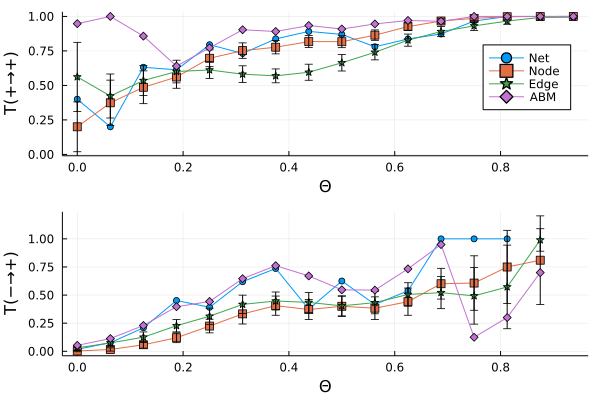

In [68]:
# parameters
pn = 0.4
pclose_triad = 0.
pr_pos = pr_neg = 0.15
padd = 0.05
threshold = [0:15...]/16

time_step = 90
time_ind = Int(time_step / 5)

fields = Symbol.(["pn", "pclose_triad", "pr_pos", "pr_neg", "padd", "threshold"])
values = []

dict = @dict pn pclose_triad pr_pos pr_neg padd threshold

L = nrow(res)

# which_rows = zeros(Bool, L)
cropped_res = deepcopy(res)
for (field, values) in dict
    inds = findall(x->x in values, cropped_res[:, field])
    # display(length(inds))
    # display(field)
    cropped_res = cropped_res[inds,:]
end

b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

xvals = real_trans_df.threshold
p1 = plot(xvals, real_trans_df.netsense_b2b, 
    markershape = :circle, label = "Net", legend = :right)#, linestyle = :none)

plot!(xvals, real_trans_df.node_rand_b2b, yerror = real_trans_df.node_rand_b2b_std, markershape = :rect, label = "Node")#, linestyle = :none)
plot!(xvals, real_trans_df.edge_rand_b2b, yerror = real_trans_df.edge_rand_b2b_std, markershape = :star5, label = "Edge")#, linestyle = :none)
plot!(xvals, b2b_vals, markershape = :diamond, label = "ABM")#, linestyle = :none)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

# p1 = plot(legend = :outertopright)
ylabel!("T(+→+)")
p2 = plot(legend = false)

plot!(xvals, real_trans_df.netsense_u2b, 
    markershape = :circle, label = "Net")#, linestyle = :none)

plot!(xvals, real_trans_df.node_rand_u2b, yerror = real_trans_df.node_rand_u2b_std, markershape = :rect, label = "Node")#, linestyle = :none)
plot!(xvals, real_trans_df.edge_rand_u2b, yerror = real_trans_df.edge_rand_u2b_std, markershape = :star5, label = "Edge")#, linestyle = :none)
plot!(xvals, u2b_vals, markershape = :diamond, label = "ABM")#, linestyle = :none)


ylabel!("T(−→+)")

plot(p1, p2, layout = (2,1))
xlabel!("Θ")

# title!("pn = 0.2, pclose_triad = 0, pr = 0.05, padd = 0.01")

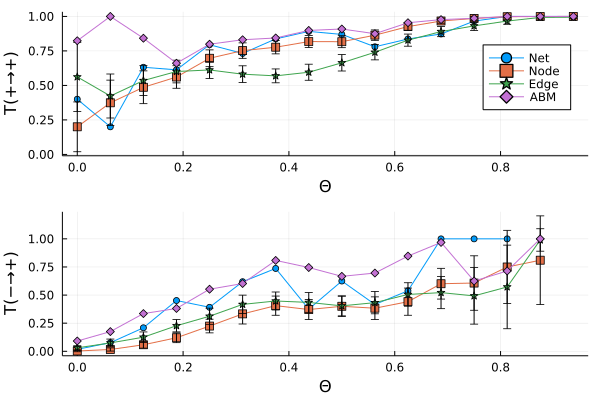

In [47]:
# parameters
pn = 0.4
pclose_triad = 0.
pr_pos = pr_neg = 0.05
padd = 0.01
threshold = [0:15...]/16

time_step = 135
time_ind = Int(time_step / 5)

fields = Symbol.(["pn", "pclose_triad", "pr_pos", "pr_neg", "padd", "threshold"])
values = []

dict = @dict pn pclose_triad pr_pos pr_neg padd threshold

L = nrow(res)

# which_rows = zeros(Bool, L)
cropped_res = deepcopy(res)
for (field, values) in dict
    inds = findall(x->x in values, cropped_res[:, field])
    # display(length(inds))
    # display(field)
    cropped_res = cropped_res[inds,:]
end

b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

xvals = real_trans_df.threshold
p1 = plot(xvals, real_trans_df.netsense_b2b, 
    markershape = :circle, label = "Net", legend = :right)#, linestyle = :none)

plot!(xvals, real_trans_df.node_rand_b2b, yerror = real_trans_df.node_rand_b2b_std, markershape = :rect, label = "Node")#, linestyle = :none)
plot!(xvals, real_trans_df.edge_rand_b2b, yerror = real_trans_df.edge_rand_b2b_std, markershape = :star5, label = "Edge")#, linestyle = :none)
plot!(xvals, b2b_vals, markershape = :diamond, label = "ABM")#, linestyle = :none)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

# p1 = plot(legend = :outertopright)
ylabel!("T(+→+)")
p2 = plot(legend = false)

plot!(xvals, real_trans_df.netsense_u2b, 
    markershape = :circle, label = "Net")#, linestyle = :none)

plot!(xvals, real_trans_df.node_rand_u2b, yerror = real_trans_df.node_rand_u2b_std, markershape = :rect, label = "Node")#, linestyle = :none)
plot!(xvals, real_trans_df.edge_rand_u2b, yerror = real_trans_df.edge_rand_u2b_std, markershape = :star5, label = "Edge")#, linestyle = :none)
plot!(xvals, u2b_vals, markershape = :diamond, label = "ABM")#, linestyle = :none)


ylabel!("T(−→+)")

plot(p1, p2, layout = (2,1))
xlabel!("Θ")

# title!("pn = 0.2, pclose_triad = 0, pr = 0.05, padd = 0.01")

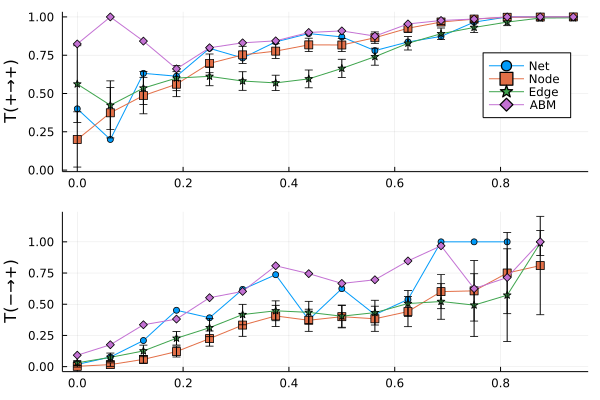

In [58]:
plot(p1, p2, layout = (2,1))

# Calculating error for edge and node randomization

In [30]:
real_trans_df

mse = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
mae = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
mse_notbeg = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
mae_notbeg = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")

mse, mae, mse_notbeg, mae_notbeg

(0.9327230755126914, 3.908759190827624, 0.8146233317693982, 3.1628818989844203)

In [31]:

mse = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
mae = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
mse_notbeg = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
mae_notbeg = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")

mse, mae, mse_notbeg, mae_notbeg

(1.257523772472556, 4.379225839404921, 1.1650954074853879, 3.798715754039451)

Apart from the error for MSE the results for ABM give better approximation of the transition probabilities. 

## Triad balanced triads density

In [38]:
dicts

2940-element Vector{Dict{String, Float64}}:
 Dict("padd" => 0.01, "pr_neg" => 0.05, "pn" => 0.0, "pclose_triad" => 0.0, "pr_pos" => 0.05)
 Dict("padd" => 0.03, "pr_neg" => 0.05, "pn" => 0.0, "pclose_triad" => 0.0, "pr_pos" => 0.05)
 Dict("padd" => 0.05, "pr_neg" => 0.05, "pn" => 0.0, "pclose_triad" => 0.0, "pr_pos" => 0.05)
 Dict("padd" => 0.07, "pr_neg" => 0.05, "pn" => 0.0, "pclose_triad" => 0.0, "pr_pos" => 0.05)
 Dict("padd" => 0.09, "pr_neg" => 0.05, "pn" => 0.0, "pclose_triad" => 0.0, "pr_pos" => 0.05)
 Dict("padd" => 0.01, "pr_neg" => 0.0, "pn" => 0.0, "pclose_triad" => 0.0, "pr_pos" => 0.05)
 Dict("padd" => 0.03, "pr_neg" => 0.0, "pn" => 0.0, "pclose_triad" => 0.0, "pr_pos" => 0.05)
 Dict("padd" => 0.05, "pr_neg" => 0.0, "pn" => 0.0, "pclose_triad" => 0.0, "pr_pos" => 0.05)
 Dict("padd" => 0.07, "pr_neg" => 0.0, "pn" => 0.0, "pclose_triad" => 0.0, "pr_pos" => 0.05)
 Dict("padd" => 0.09, "pr_neg" => 0.0, "pn" => 0.0, "pclose_triad" => 0.0, "pr_pos" => 0.05)
 ⋮
 Dict("padd" => 0.

In [ ]:
function plot_dict(dicts, df, param_ind)

    dict = dicts[results_df[param_ind, :dict_ind]]
    cropped_res = get_part_dataframe(res, dict)

    time_ind = Int(results_df[param_ind, :time_ind])
    xvals = cropped_res[:, :threshold]
    b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
    u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

    p1 = plot(xvals, b2b_vals, markershape = markers[1], label = "ABM T(+->+)")#, linestyle = :none)
    plot!(p1, xvals, u2b_vals, markershape = markers[2], label = "ABM T(-->+)")#, linestyle = :none)
    plot!(p1, real_trans_df.threshold, real_trans_df.netsense_b2b, markershape = markers[3], label = "Net T(+->+)")#, linestyle = :none)
    plot!(p1, real_trans_df.threshold, real_trans_df.netsense_u2b, markershape = markers[4], label = "Net T(-->+)")#, linestyle = :none)
    title!(p1, "steps="*string(10*time_ind))
    
    return p1
end

p1 = plot_dict(dicts, results_df, 665)
# title!(p1, string(dicts[results_df[665, :dict_ind]]))
display(string(dicts[results_df[665, :dict_ind]]))
p2 = plot_dict(dicts, results_df, 60)
display(string(dicts[results_df[60, :dict_ind]]))
# title!(p1, dicts[results_df[665, :dict_ind]])
p3 = plot_dict(dicts, results_df, 1481)
display(string(dicts[results_df[1481, :dict_ind]]))
# title!(p1, dicts[results_df[665, :dict_ind]])

plot!(p1, legend = :outertopright)
plot!(p1, legend = :outerbottom)
plot!(p2, legend = false)
plot!(p3, legend = false)

plot(p1, p2, p3, layout = (1,3))

## Influence of different pn values for specific theta

In [17]:
threshold = [14] / 16
# pn = [0.]

# parameters
# pn = [0.8]
# pclose_triad = unique(res.pclose_triad)
# pr_pos = pr_neg = unique(res.pr_pos)
# padd = unique(res.padd)
# threshold = [0:15...]/16

time_points = [45, 90, 135, 180, 270]
time_inds = Int.(time_points ./ 5)

strdicts = @strdict  threshold#padd pclose_triad pr_pos pr_neg
dicts = dict_list(strdicts)

dict = dicts[1]

cropped_res = get_part_dataframe(res, dict; verbose =false)

nrow(cropped_res)

360

In [18]:
dict

Dict{String, Float64} with 1 entry:
  "threshold" => 0.875

In [19]:
time_ind = time_inds[3]

27

In [20]:
cropped_res.b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
cropped_res.u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]];


In [21]:
using DataFrames, GLM

lm1 = fit(LinearModel, @formula(pn ~ b2b_vals), cropped_res)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

pn ~ 1 + b2b_vals

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -35.536      26.9772  -1.32    0.1886   -88.5897    17.5176
b2b_vals      36.0386     26.9791   1.34    0.1825   -17.0188    89.0959
────────────────────────────────────────────────────────────────────────

As expected, with small threshold pn is not important. With $\Theta=0.5$, it is very important. 

In [44]:
unique(res.pn)

6-element Vector{Union{Missing, Float64}}:
 0.0
 0.2
 0.4
 0.6
 0.8
 1.0